# Regression Assignment 

In [4]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression 

Simple Regression Results
                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     5908.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        21:15:17   Log-Likelihood:                -3843.9
No. Observations:                1076   AIC:                             7692.
Df Residuals:                    1074   BIC:                             7702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7372     

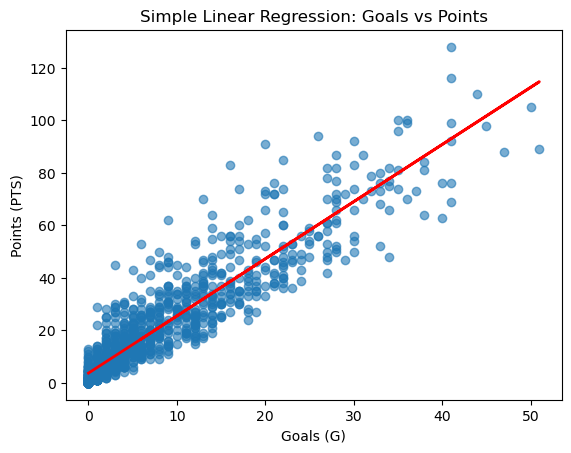

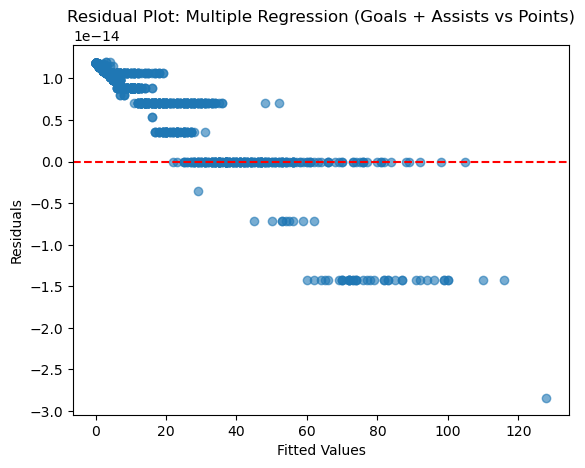

In [10]:
# Import libraries
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load dataset
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

# --- Simple Regression: Goals vs Points ---
model_simple = smf.ols('PTS ~ G', data=df).fit()
print("Simple Regression Results")
print(model_simple.summary())

# --- Multiple Regression: Goals + Assists vs Points ---
model_multi = smf.ols('PTS ~ G + A', data=df).fit()
print("\nMultiple Regression Results")
print(model_multi.summary())

# --- Plot for Simple Regression ---
plt.scatter(df['G'], df['PTS'], alpha=0.6)
plt.plot(df['G'], model_simple.predict(df[['G']]), color='red', linewidth=2)
plt.xlabel("Goals (G)")
plt.ylabel("Points (PTS)")
plt.title("Simple Linear Regression: Goals vs Points")
plt.show()

# --- Residual Plot for Multiple Regression ---
residuals = model_multi.resid
plt.scatter(model_multi.fittedvalues, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Multiple Regression (Goals + Assists vs Points)")
plt.show()

# Logistic Regresssion

Optimization terminated successfully.
         Current function value: 0.625143
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Death1   No. Observations:                  173
Model:                          Logit   Df Residuals:                      169
Method:                           MLE   Df Model:                            3
Date:                Tue, 30 Sep 2025   Pseudo R-squ.:                 0.07048
Time:                        22:03:28   Log-Likelihood:                -108.15
converged:                       True   LL-Null:                       -116.35
Covariance Type:            nonrobust   LLR p-value:                 0.0009390
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3345      0.320     -1.046      0.296      -0.961       0.292
Appearances     0.0008    

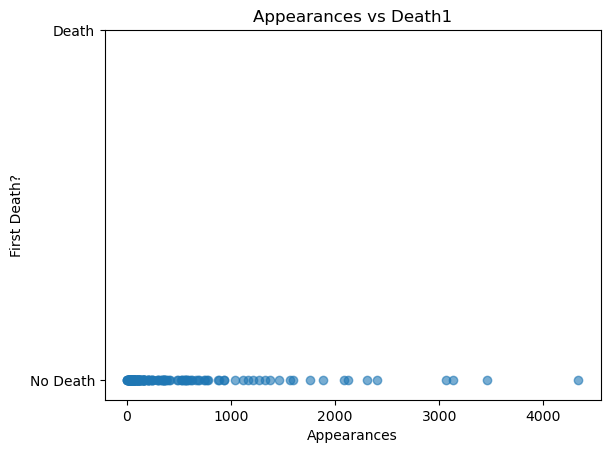

In [29]:
# Load the 538 Avengers dataset
df = pa.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv", 
                encoding="latin1"
                )

# Clean up: we'll use Death1 as the target (first time a character might die)
df = df.dropna(subset=['Death1', 'Appearances', 'Current?', 'Gender'])

# Make binary target
df['Death1'] = df['Death1'].apply(lambda x: 1 if x == 'YES' else 0)

# Encode categoricals
df['Gender'] = df['Gender'].map({'MALE': 1, 'FEMALE': 0})
df['Current'] = df['Current?'].map({'YES': 1, 'NO': 0})

import statsmodels.formula.api as smf

# Logistic regression: predict Death1 from Appearances, Gender, and Current status
model_logit = smf.logit('Death1 ~ Appearances + Gender + Current', data=df).fit()
print(model_logit.summary())

# Example: predict probability for Thor
thor = df[df['Name/Alias'].str.contains("Thor Odinson", case=False, na=False)]
print("\nThor's predicted probability of first death:")
print(model_logit.predict(thor))

df['Death1'] = df['Death1'].apply(lambda x: 1 if x == "YES" else 0)

plt.scatter(df['Appearances'], df['Death1'], alpha=0.6)
plt.yticks([0, 1], ["No Death", "Death"])
plt.xlabel("Appearances")
plt.ylabel("First Death?")
plt.title("Appearances vs Death1")
plt.show()

# Olympics stuff

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     16.91
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           0.000100
Time:                        22:18:11   Log-Likelihood:                -88.063
No. Observations:                  76   AIC:                             180.1
Df Residuals:                      74   BIC:                             184.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.5834      5.951      5.979      0.0

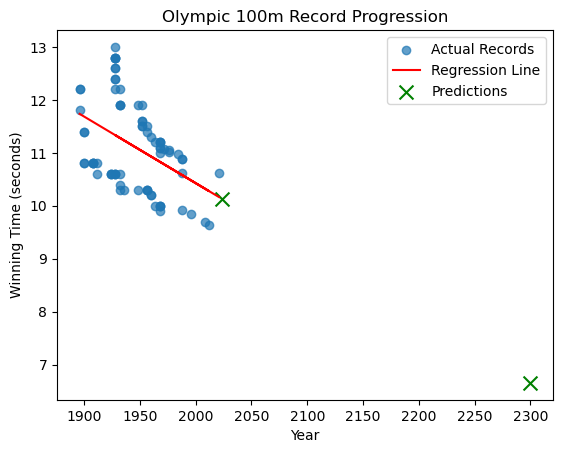

                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     16.91
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           0.000100
Time:                        22:18:12   Log-Likelihood:                -88.063
No. Observations:                  76   AIC:                             180.1
Df Residuals:                      74   BIC:                             184.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.5834      5.951      5.979      0.0

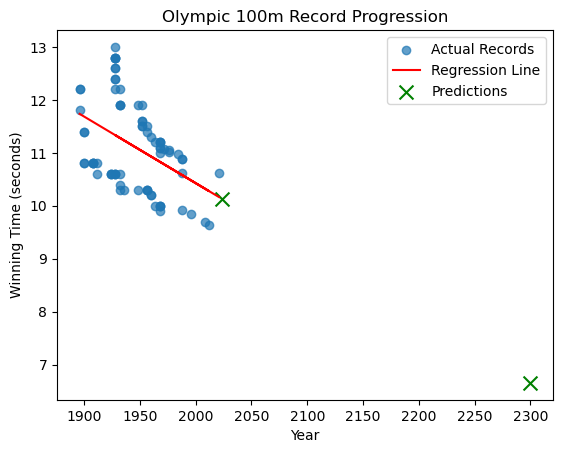

In [36]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load dataset
df = pa.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv")

# Keep only the relevant columns
df = df[['Time','Games']].dropna()

# --- Regression: Time vs Year ---
model = smf.ols('Time ~ Games', data=df).fit()
print(model.summary())

# --- Predictions for 2024 and 2300 ---
future_years = pa.DataFrame({'Games': [2024, 2300]})
predictions = model.predict(future_years)
print("\nPredicted Olympic 100m Record:")
print("2024:", predictions.iloc[0], "seconds")
print("2300:", predictions.iloc[1], "seconds")

# --- Plot ---
plt.scatter(df['Games'], df['Time'], alpha=0.7, label="Actual Records")
plt.plot(df['Games'], model.predict(df), color='red', label="Regression Line")
plt.scatter([2024, 2300], predictions, color='green', marker='x', s=100, label="Predictions")
plt.xlabel("Year")
plt.ylabel("Winning Time (seconds)")
plt.title("Olympic 100m Record Progression")
plt.legend()
plt.show()
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Load dataset
df = pa.read_csv("https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv")

# Keep only the relevant columns
df = df[['Time','Games']].dropna()

# --- Regression: Time vs Year ---
model = smf.ols('Time ~ Games', data=df).fit()
print(model.summary())

# --- Predictions for 2024 and 2300 ---
future_years = pa.DataFrame({'Games': [2024, 2300]})
predictions = model.predict(future_years)
print("\nPredicted Olympic 100m Record:")
print("2024:", predictions.iloc[0], "seconds")
print("2300:", predictions.iloc[1], "seconds")

# --- Plot ---
plt.scatter(df['Games'], df['Time'], alpha=0.7, label="Actual Records")
plt.plot(df['Games'], model.predict(df), color='red', label="Regression Line")
plt.scatter([2024, 2300], predictions, color='green', marker='x', s=100, label="Predictions")
plt.xlabel("Year")
plt.ylabel("Winning Time (seconds)")
plt.title("Olympic 100m Record Progression")
plt.legend()
plt.show()